In [1]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns

## The Plan!
- Chemometrics: Use BMK data to train a Chemometrics model

## To get marks: 
1. **Plotting:** Creat nice looking plots. Increase the complexity of the plots without deacreasing the legibility
2. **PANDAS:** Use Pandas to read/write/manipulate the data
3. **NUMPY:** How would I use NUMPY for this? 
4. **DATETIME:** Use the datetime module in Python 
5. **Machine Learning and Regression:** Use Scikit learn and some sort of regression to answer a question.
6. **Increase the range of the data:** How would I do this?  
 
#### Example:
- How much wind power is there at a particular location?
    - This is quite open ended, is this just the mean wind speed for
an hour/day/month/year, or should you take into account that
there are wind ranges that the windfarms can operate in. (min
max speeds)
    - Some analysis of what power when would be useful (time of
day/year)
- Are the wind speeds likely to be the same in 10 years in the future? ie
is there a trend in recorded wind speeds over the last few decades.
- Is there any other weather metric worth analyzing (eg rain, temp)
- What will the power output of the windfarms in Ireland be like next
week, according to the weather forecasts?

In [4]:
reference_raman_spectra= pd.read_csv("Raw Raman Data - Reference.csv")
reference_raman_spectra

,RamanShift,0.625 mg/mL IgG1,1.25 mg/mL IgG1,2.5 mg/mL IgG1,5 mg/mL IgG1,10 mg/mL IgG1
0,3425,1.148563e+06,1.198166e+06,1.206326e+06,1.195576e+06,1.145207e+06
1,3424,1.147940e+06,1.200701e+06,1.209882e+06,1.200249e+06,1.143337e+06
2,3423,1.146370e+06,1.203749e+06,1.208789e+06,1.202838e+06,1.141522e+06
3,3422,1.146941e+06,1.207620e+06,1.206416e+06,1.204755e+06,1.142454e+06
4,3421,1.149270e+06,1.207037e+06,1.206871e+06,1.207519e+06,1.146455e+06
...,...,...,...,...,...,...
3321,104,3.753913e+05,3.963242e+05,4.022696e+05,4.083398e+05,4.052066e+05
3322,103,3.735581e+05,3.946033e+05,4.005288e+05,4.065235e+05,4.038400e+05
3323,102,3.714719e+05,3.924005e+05,3.982939e+05,4.041501e+05,4.020557e+05
3324,101,3.691386e+05,3.898265e+05,3.955637e+05,4.012652e+05,3.998573e+05


In [ ]:
reference_raman_spectra.columns[1:][0]


'0.625 mg/mL IgG1'

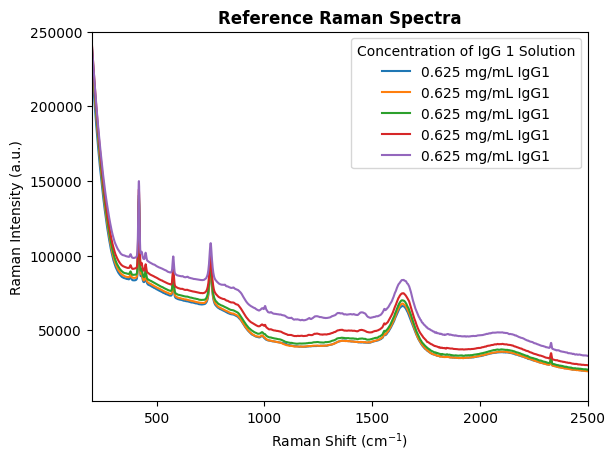

In [ ]:
fig, ax = plt.subplots()
for i in reference_raman_spectra.columns[1:]:
    ax.plot(
        reference_raman_spectra["RamanShift"],
        reference_raman_spectra[i],
        label=f"{reference_raman_spectra.columns[1:][0]}"
    )

ax.set_xlim(200,2500)
ax.set_ylim(2500,0.25e6)
ax.set_xlabel(r'Raman Shift (cm$^{-1})$')
ax.set_ylabel("Raman Intensity (a.u.)")
ax.set_title("Reference Raman Spectra",
             fontdict = {'fontsize': 'large','fontweight' : "bold",}
             )
ax.legend(title= "Concentration of IgG 1 Solution")

In [ ]:
experimental_raman_spectra= pd.read_csv("Raw Raman Data - Experiment.csv").T #Header=0 doesn't work here as transposition of the csv being read in occurs after that argument is passed
experimental_raman_spectra.columns=experimental_raman_spectra.iloc[0].to_list() #Set the first row as the column header
experimental_raman_spectra.drop(index=experimental_raman_spectra.index[0], inplace=True) #Drop the first row
experimental_raman_spectra


,3.166667,8.183333,13.183333,18.166667,23.183333,28.183333,33.183333,38.183333,43.183333,48.183333,53.183333,58.183333,63.183333,68.200000
3425,1.781338e+06,1.773418e+06,1.788059e+06,1.792322e+06,1.777867e+06,1.774147e+06,1.787218e+06,1.786675e+06,1.779512e+06,1.788226e+06,1.772357e+06,1.662639e+06,1.734222e+06,1.733768e+06
3424,1.784071e+06,1.779908e+06,1.793351e+06,1.794224e+06,1.778261e+06,1.776088e+06,1.792257e+06,1.787795e+06,1.784297e+06,1.784351e+06,1.765856e+06,1.660756e+06,1.738868e+06,1.735666e+06
3423,1.784213e+06,1.783093e+06,1.796588e+06,1.793311e+06,1.780583e+06,1.777577e+06,1.798424e+06,1.788406e+06,1.783741e+06,1.781434e+06,1.764423e+06,1.663915e+06,1.736379e+06,1.738728e+06
3422,1.785078e+06,1.780479e+06,1.795893e+06,1.794067e+06,1.785154e+06,1.779767e+06,1.804203e+06,1.791386e+06,1.780541e+06,1.785528e+06,1.770307e+06,1.668102e+06,1.734063e+06,1.743232e+06
3421,1.788761e+06,1.776802e+06,1.791839e+06,1.798414e+06,1.786135e+06,1.781441e+06,1.804657e+06,1.793752e+06,1.781275e+06,1.790698e+06,1.778844e+06,1.670313e+06,1.739309e+06,1.746469e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,7.552651e+05,7.489525e+05,7.678429e+05,7.298745e+05,7.328634e+05,7.345030e+05,7.308791e+05,7.195199e+05,7.016268e+05,7.085999e+05,7.058394e+05,7.149267e+05,7.032557e+05,7.161269e+05
103,7.547458e+05,7.486215e+05,7.663141e+05,7.299429e+05,7.334467e+05,7.351097e+05,7.313907e+05,7.203399e+05,7.018966e+05,7.087644e+05,7.055472e+05,7.145292e+05,7.036454e+05,7.164104e+05
102,7.537162e+05,7.476131e+05,7.642901e+05,7.296217e+05,7.334008e+05,7.351691e+05,7.314780e+05,7.205861e+05,7.017223e+05,7.083210e+05,7.045297e+05,7.132770e+05,7.031670e+05,7.159925e+05
101,7.520893e+05,7.458689e+05,7.619943e+05,7.288163e+05,7.325269e+05,7.345804e+05,7.310644e+05,7.202219e+05,7.011648e+05,7.072187e+05,7.029183e+05,7.111602e+05,7.017537e+05,7.148241e+05


In [167]:
experimental_raman_spectra.index

Index(['3425', '3424', '3423', '3422', '3421', '3420', '3419', '3418', '3417',
       '3416',
       ...
       '109', '108', '107', '106', '105', '104', '103', '102', '101', '100'],
      dtype='object', length=3326)

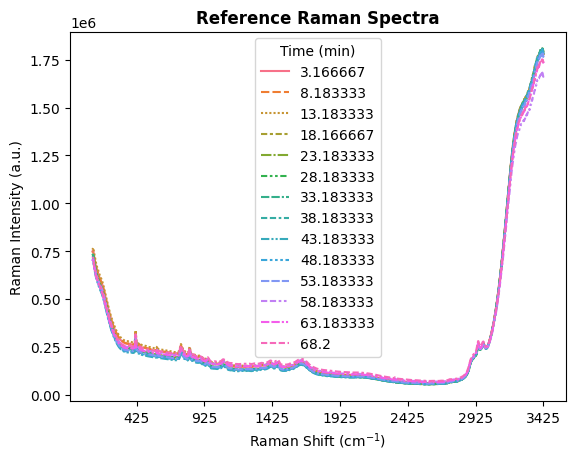

In [175]:
fig, ax = plt.subplots()

sns.lineplot(
    experimental_raman_spectra,
    ax=ax
)
ax.invert_xaxis()
ax.set_xticks(experimental_raman_spectra.index[::500].to_list())
ax.set_xlabel(r'Raman Shift (cm$^{-1})$')
ax.set_ylabel("Raman Intensity (a.u.)")
ax.set_title("Reference Raman Spectra",
             fontdict = {'fontsize': 'large','fontweight' : "bold",}
             )
ax.legend(title= "Time (min)")

To do:
- Set the xlim and ylim properly 
- Set the legende to be outside the plot
- Convert time to min and sec 

